# Homework Rakamin Trial Class Batch 33 - Mini Case
> Author: Nabilah Sharfina

## A. Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## B. Import Library

In [2]:
import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

## C. Data Preparation

In [3]:
# Baca data dari file CSV
df = pd.read_csv("/content/drive/MyDrive/RAKAMIN ACADEMY/TRIAL CLASS/BATCH 33/Dataset/online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
# Mengecek baris yang duplikat
df.duplicated().sum()

34335

# Mengukur Performa Penjualan Ritel Online
> Bayangkan kamu sedang bekerja di sebuah perusahaan ritel online, dan pelanggannya sudah tersebar dari berbagai negara. Kamu diberikan data yang berisi semua transaksi yang terjadi di tahun 2009-2011. Saat ini kamu diminta untuk menganalisis bagaimana performa penjualan dalam kurun waktu 3 tahun terakhir.

> Berikut adalah penjelasan untuk masing-masing kolom (**Attributes**):
* Invoice : Nomor invoice 6 digit yang ditetapkan secara unik untuk setiap transaksi.
Jika kode ini dimulai dengan huruf 'C', itu menunjukkan pembatalan.
* StockCode : Kode produk (barang). Angka 5 digit yang ditetapkan secara unik untuk
setiap produk yang berbeda.
* Description : Nama produk.
* Quantity : Jumlah kuantitas setiap produk per transaksi.
* InvoiceDate : Tanggal dan waktu invoice, yakni hari dan waktu saat transaksi dibuat.
* UnitPrice : Harga satuan atau harga produk per unit dalam sterling (£).
* CustomerID : Nomor 5 digit yang ditetapkan secara unik untuk setiap pelanggan.
* Country : Nama negara tempat tinggal pelanggan.

## A. Section 1: Menganalisis Rata-Rata Pendapatan Per Tahun

### 1. Create New Feature: Year
> Buat kolom baru dengan nama Year yang berisi nilai tahun dari Invoice Date.
* Ubah tipe data kolom InvoiceDate menjadi tipe `datetime`.
* Gunakan function dari library pandas untuk mendapatkan tahun dari kolom
InvoiceDate
`DatetimeIndex(data['InvoiceDate']).year`

In [7]:
# Konversi kolom "Invoice Date" menjadi format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [8]:
# Buat kolom baru "Year" dengan nilai tahun dari "Invoice Date"
df['Year'] = df['InvoiceDate'].dt.year

# Tampilkan 5 baris teratas dari data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### 2. Filtering Data
> Buat filtering data dengan ketentuan di bawah ini dan simpan dalam variabel baru, misalnya sales
* Quantity minimal 1 (tidak boleh 0 dan minus)
* Kolom Invoice tidak mengandung huruf ‘C’ karena hal tersebut menandakan
pelanggan tidak menyelesaikan belanjanya atau melakukan pembatalan

In [9]:
df = df.reindex(['Customer ID', 'Invoice', 'StockCode', 'Description', 'Quantity', 'Price', 'Country', 'InvoiceDate', 'Year'], axis=1)
df.head()

,Customer ID,Invoice,StockCode,Description,Quantity,Price,Country,InvoiceDate,Year
0,13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,2009-12-01 07:45:00,2009
1,13085.0,489434,79323P,PINK CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01 07:45:00,2009
2,13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01 07:45:00,2009
3,13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,2009-12-01 07:45:00,2009
4,13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,2009-12-01 07:45:00,2009


In [10]:
# Filter data dengan Quantity minimal 1 (tidak boleh 0 dan minus)
sales = df[df['Quantity'] > 0]

# Tampilkan 5 baris teratas dari data yang sudah difilter
sales.head()

,Customer ID,Invoice,StockCode,Description,Quantity,Price,Country,InvoiceDate,Year
0,13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,2009-12-01 07:45:00,2009
1,13085.0,489434,79323P,PINK CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01 07:45:00,2009
2,13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01 07:45:00,2009
3,13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,2009-12-01 07:45:00,2009
4,13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,2009-12-01 07:45:00,2009


In [11]:
# Filter data dengan kolom Invoice yang tidak mengandung huruf 'C'
sales = df[~df['Invoice'].str.contains('C')]

# Tampilkan 5 baris teratas dari data yang sudah difilter
sales.head()

,Customer ID,Invoice,StockCode,Description,Quantity,Price,Country,InvoiceDate,Year
0,13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,2009-12-01 07:45:00,2009
1,13085.0,489434,79323P,PINK CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01 07:45:00,2009
2,13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01 07:45:00,2009
3,13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,2009-12-01 07:45:00,2009
4,13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,2009-12-01 07:45:00,2009


### 3. Create New Feature: Revenue
> Buat kolom baru bernama Revenue dengan nilai Quantity dikali dengan Price

In [12]:
# Buat kolom baru bernama Revenue dengan nilai Quantity dikali dengan Price
sales['Revenue'] = sales['Quantity'] * sales['Price']
sales.head()

<ipython-input-12-a0161148693d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Revenue'] = sales['Quantity'] * sales['Price']


,Customer ID,Invoice,StockCode,Description,Quantity,Price,Country,InvoiceDate,Year,Revenue
0,13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,2009-12-01 07:45:00,2009,83.4
1,13085.0,489434,79323P,PINK CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01 07:45:00,2009,81.0
2,13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01 07:45:00,2009,81.0
3,13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,2009-12-01 07:45:00,2009,100.8
4,13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,2009-12-01 07:45:00,2009,30.0


### 4. Average of Revenue per Year
> Hitung rata-rata Revenue per tahun. Lalu buatlah visualisasinya.

In [13]:
# Menghitung rata-rata Revenue per tahun
revenue_per_year = sales.groupby('Year')['Revenue'].mean().reset_index()
# revenue_per_year.rename(columns={"Revenue":"Average Revenue per Year"}, inplace=True)
revenue_per_year['Year'] = pd.to_datetime(revenue_per_year['Year'], format='%Y')

# Menampilkan rata-rata Revenue per tahun
print('Rata-rata Revenue tiap tahun adalah:')
revenue_per_year

Rata-rata Revenue tiap tahun adalah:


,Year,Revenue
0,2009-01-01,18.675181
1,2010-01-01,19.827417
2,2011-01-01,20.007033


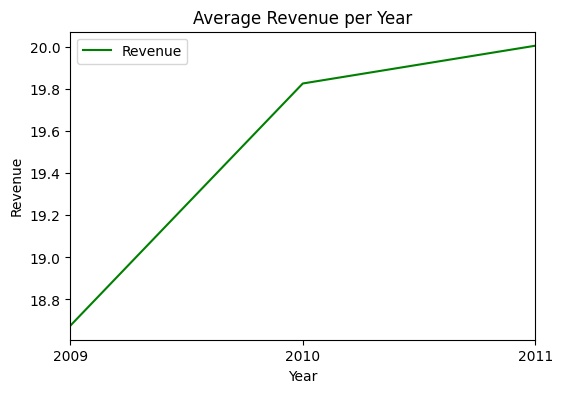

In [14]:
revenue_per_year.plot(x='Year', y='Revenue', kind='line', figsize=(6,4), color='green')
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

### 5. Interpretation
> Tuliskan interpretasi-mu dari output nomor 4
* Berdasarkan analisis perhitungan nilai rata rata penjualan per tahun, didapat hasil bahwa pendapatan per tahun mengalami peningkatan dengan perolehan rata rata pendapatan paling tinggi pada tahun 2011 sebesar 20.007033

## B. Section 2: Menganalisis Transaksi Pelanggan Per Tahun

### 1. Customers who finished their purchases
> Lakukan filtering menggunakan data sales (data yang sudah di filter pada section 1) dengan ketentuan CustomerID tidak boleh kosong atau null. Kemudian simpan dalam variabel finished.

In [15]:
sales.isnull().sum()

Customer ID    242257
Invoice             0
StockCode           0
Description      4382
Quantity            0
Price               0
Country             0
InvoiceDate         0
Year                0
Revenue             0
dtype: int64

In [16]:
# Filter data dengan CustomerID tidak kosong atau null
finished = sales[sales['Customer ID'].notna()]
len(finished)

805620

In [17]:
finished.isnull().sum()

Customer ID    0
Invoice        0
StockCode      0
Description    0
Quantity       0
Price          0
Country        0
InvoiceDate    0
Year           0
Revenue        0
dtype: int64

### 2. Customers who canceled their purchases
> Lakukan filtering data untuk mengelompokkan pelanggan yang membatalkan belanjanya, dengan cara mendeteksi kolom `Invoice` mengandung huruf ‘C’. Kemudian simpan dalam variabel baru bernama cancel.

In [18]:
# Filter data dengan Invoice mengandung huruf 'C'
cancel = df[df['Invoice'].str.contains('C')]

# Menampilkan 5 baris teratas dari data yang sudah difilter
cancel.head()

,Customer ID,Invoice,StockCode,Description,Quantity,Price,Country,InvoiceDate,Year
178,16321.0,C489449,22087,PAPER BUNTING WHITE LACE,-12,2.95,Australia,2009-12-01 10:33:00,2009
179,16321.0,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,1.65,Australia,2009-12-01 10:33:00,2009
180,16321.0,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,4.25,Australia,2009-12-01 10:33:00,2009
181,16321.0,C489449,21896,POTTING SHED TWINE,-6,2.10,Australia,2009-12-01 10:33:00,2009
182,16321.0,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2.95,Australia,2009-12-01 10:33:00,2009


In [19]:
len(cancel)

19494

In [20]:
cancel.isnull().sum()

Customer ID    750
Invoice          0
StockCode        0
Description      0
Quantity         0
Price            0
Country          0
InvoiceDate      0
Year             0
dtype: int64

### 3. Number of Finished and Canceled Transactions Each Year
> Hitung jumlah transaksi yang berhasil (dari variabel finished) dan jumlah transaksi yang dibatalkan (dari variabel canceled) untuk setiap tahunnya. Lalu buatlah visualisasinya (grafik)

In [21]:
finished_total = finished.groupby("Year")["Invoice"].count().reset_index()
finished_total.rename(columns={"Invoice":"Finished"}, inplace=True)
finished_total

,Year,Finished
0,2009,30761
1,2010,403094
2,2011,371765


In [22]:
canceled_total = cancel.groupby("Year")["Invoice"].count().reset_index()
canceled_total.rename(columns={"Invoice":"Canceled"}, inplace=True)
canceled_total

,Year,Canceled
0,2009,1015
1,2010,9919
2,2011,8560


In [23]:
transaction = canceled_total['Canceled']
summary_transaction = finished_total
summary_transaction['Canceled'] = transaction
summary_transaction

,Year,Finished,Canceled
0,2009,30761,1015
1,2010,403094,9919
2,2011,371765,8560


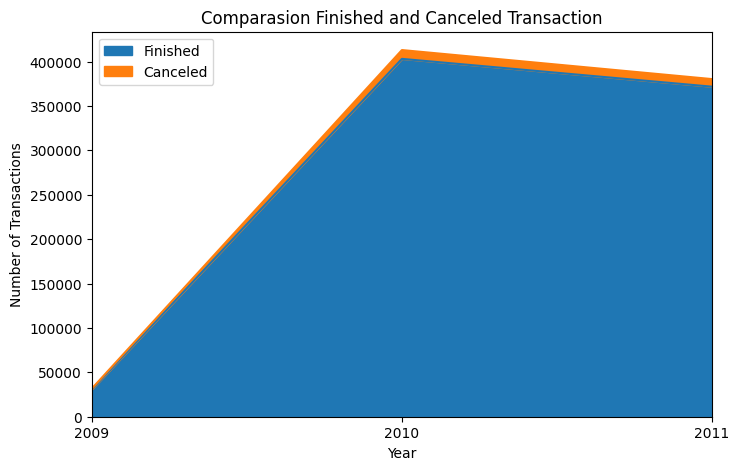

In [24]:
summary_transaction['Year'] = pd.to_datetime(summary_transaction['Year'], format='%Y')
summary_transaction.plot(x='Year', kind='area', figsize=(8,5))
plt.title('Comparasion Finished and Canceled Transaction')
plt.ylabel('Number of Transactions')
plt.xlabel('Year')
plt.show()

### 4. Cancellation Rate
> Hitung cancellation rate untuk setiap tahunnya.
Cancellation rate adalah persentase pelanggan yang melakukan pembatalan order yang telah dilakukan. Formulanya adalah jumlah customer yang cancel dibagi jumlah seluruh customer kemudian dikali 100%.

In [25]:
total_transaction = summary_transaction['Finished'] + summary_transaction['Canceled']
total_transaction

0     31776
1    413013
2    380325
dtype: int64

In [26]:
cancel_rate = summary_transaction['Canceled'] / total_transaction * 100
cancel_rate.values.tolist()

for i in range (len(cancel_rate)):
  print(2009 + i, "have been reached cancellation rate value of", "{:.2f}%".format(cancel_rate[i]))

2009 have been reached cancellation rate value of 3.19%
2010 have been reached cancellation rate value of 2.40%
2011 have been reached cancellation rate value of 2.25%


### 5. Interpretation
> Bandingkan hasil output nomor 3 dan 4 untuk setiap tahunnya, dan tuliskan interpretasi-mu.
* Performa penjualan apabila dilihat dalam kurun waktu 3 tahun terakhir mengalami peningkatan yang baik, karena cancellation rate mengalami penurunan pada tahun 2010 (sekitar 2.40%) ke tahun 2011 (sekitar 2.25%).